In [97]:
rm(list = ls())

In [98]:
required.packages = c('forecast','MLmetrics')
for (pkg in required.packages){
    if(!require(pkg,character.only = TRUE)){
        install.packages(pkg)
    }
}

In [99]:
#get data
library(lubridate)
sales = read.csv(file = '../data/sales.txt',header = T,sep = ';',stringsAsFactors = T)

In [100]:
head(sales)

country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2
Germany,AA1821,62,31.95,25.95,0.8122066,2014-12-28,1,0
Germany,AA1821,29,31.95,22.95,0.7183099,2015-01-04,0,0
Germany,AA1821,58,31.95,28.95,0.9061033,2015-01-11,0,0
Germany,AA1821,49,31.95,29.95,0.9374022,2015-01-18,0,0
Germany,AA1821,883,31.95,24.95,0.7809077,2015-01-25,0,0
Germany,AA1821,43,31.95,31.95,1.0000000,2015-02-01,0,0


In [101]:
summary(sales)

    country         article          sales        regular_price   
 Austria:28782   AA7884 :  369   Min.   :  1.00   Min.   :  3.95  
 France :12669   BR3179 :  369   1st Qu.: 10.00   1st Qu.: 25.95  
 Germany:39975   BS7795 :  369   Median : 26.00   Median : 41.45  
                 CB4942 :  369   Mean   : 57.05   Mean   : 52.62  
                 CF4856 :  369   3rd Qu.: 65.00   3rd Qu.: 79.95  
                 EF6812 :  369   Max.   :898.00   Max.   :197.95  
                 (Other):79212                                    
 current_price        ratio             retailweek        promo1       
 Min.   :  1.95   Min.   :0.2965   2014-12-28:  662   Min.   :0.00000  
 1st Qu.: 11.95   1st Qu.:0.3548   2015-01-04:  662   1st Qu.:0.00000  
 Median : 20.95   Median :0.5235   2015-01-11:  662   Median :0.00000  
 Mean   : 28.36   Mean   :0.5445   2015-01-18:  662   Mean   :0.06504  
 3rd Qu.: 37.95   3rd Qu.:0.6973   2015-01-25:  662   3rd Qu.:0.00000  
 Max.   :197.95   Max.   :1.0000

In [102]:
str(sales)

'data.frame':	81426 obs. of  9 variables:
 $ country      : Factor w/ 3 levels "Austria","France",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ article      : Factor w/ 477 levels "AA1821","AA7884",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sales        : int  62 29 58 49 883 43 67 173 53 19 ...
 $ regular_price: num  31.9 31.9 31.9 31.9 31.9 ...
 $ current_price: num  25.9 22.9 28.9 29.9 24.9 ...
 $ ratio        : num  0.812 0.718 0.906 0.937 0.781 ...
 $ retailweek   : Factor w/ 123 levels "2014-12-28","2015-01-04",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ promo1       : int  1 0 0 0 0 0 0 0 0 0 ...
 $ promo2       : int  0 0 0 0 0 0 0 0 0 0 ...


In [103]:
articles = levels(sales$article)

[1] 369   9

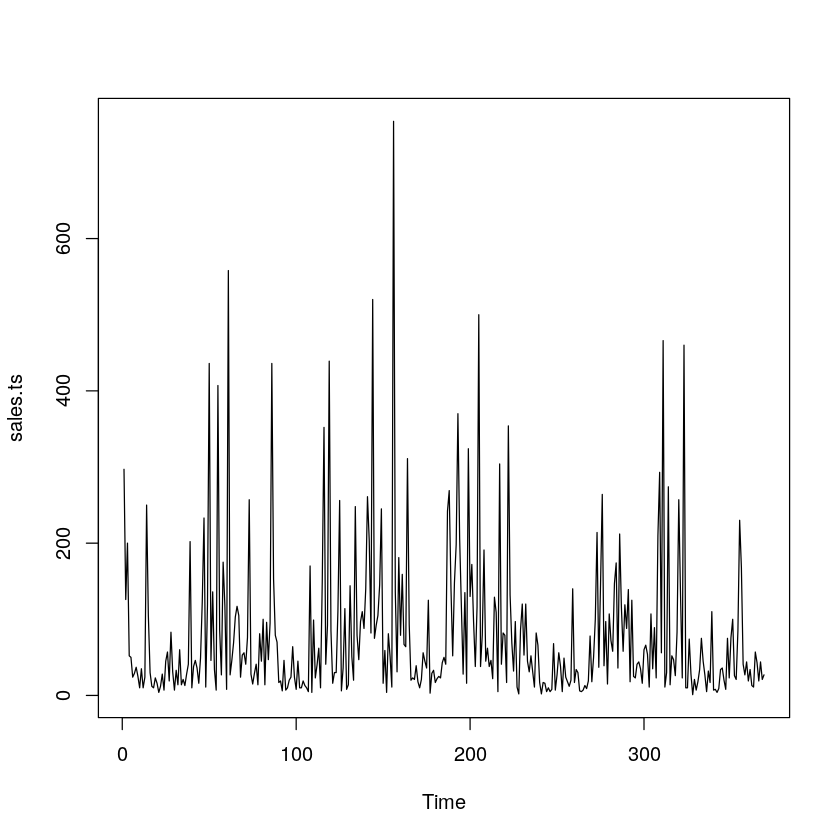

In [104]:
#plotting weekly data
x = articles[2] #select one of the articles
sales1 = subset(x = sales,subset = (article==x))
dim(sales1)
sales1$retailweek.date = as.POSIXct(strptime(x = sales1$retailweek,format = "%Y-%m-%d"))
sales1 = sales1[order(sales1$retailweek.date),]
sales.ts = ts(data = sales1$sales,start = 1,frequency = 1)
plot(sales.ts)

In [105]:
sales1$month = sapply(X = sales1$retailweek.date,FUN = function(x) month(x))
sales1$year = sapply(X = sales1$retailweek.date,FUN = function(x) year(x))
sales1.monthly = aggregate(formula = cbind(sales,promo1,promo2)~month+year ,data = sales1,FUN = sum)
head(sales1)
head(sales1.monthly)

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,retailweek.date,month,year
124,Austria,AA7884,297,42.95,19.95,0.4644936,2014-12-28,1,0,2014-12-28,12,2014
247,France,AA7884,126,42.95,21.95,0.5110594,2014-12-28,1,0,2014-12-28,12,2014
370,Germany,AA7884,200,42.95,21.95,0.5110594,2014-12-28,1,0,2014-12-28,12,2014
125,Austria,AA7884,52,42.95,21.95,0.5110594,2015-01-04,0,0,2015-01-04,1,2015
248,France,AA7884,50,42.95,30.95,0.7206054,2015-01-04,0,0,2015-01-04,1,2015
371,Germany,AA7884,24,42.95,32.95,0.7671711,2015-01-04,0,0,2015-01-04,1,2015


month,year,sales,promo1,promo2
12,2014,623,3,0
1,2015,651,0,1
2,2015,263,0,0
3,2015,641,0,0
4,2015,1246,0,0
5,2015,1923,0,0


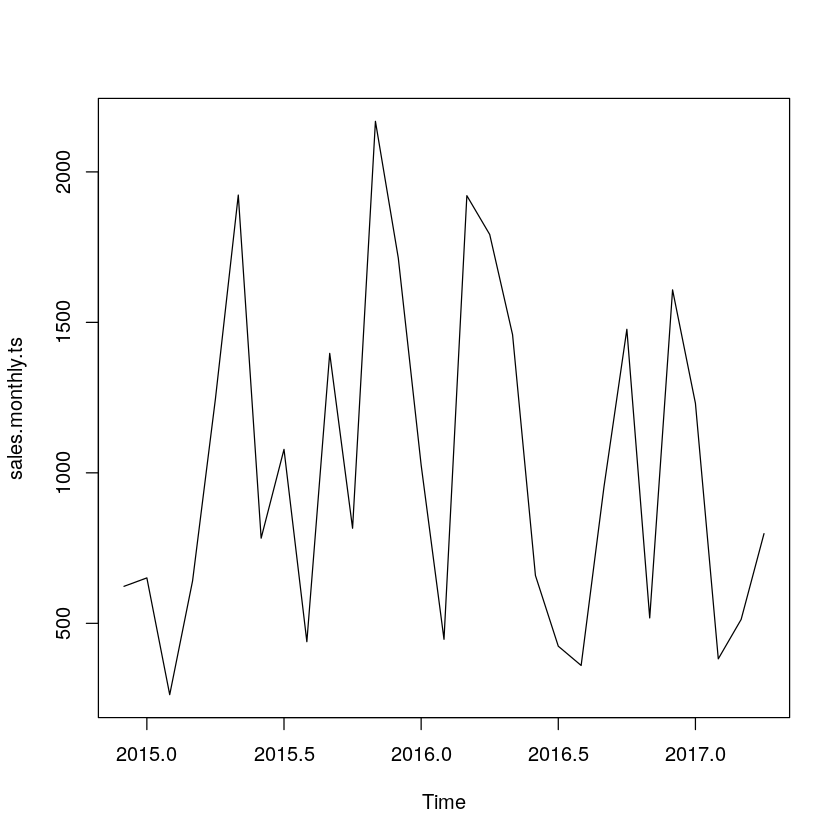

In [106]:
start.year = sales1.monthly$year[1]
start.month = sales1.monthly$month[1]
sales.monthly.ts = ts(data = sales1.monthly$sales,start = 
                      c(start.year,start.month),frequency = 12)
plot(sales.monthly.ts)

In [107]:
#conclusion :no trend found for first 5 articles

 Call:
 stl(x = sales.monthly.ts, s.window = "per")

Components
           seasonal     trend  remainder
Dec 2014  394.02594  544.5591 -315.58503
Jan 2015   43.26264  625.4465  -17.70918
Feb 2015 -567.16698  706.3340  123.83299
Mar 2015   92.84799  782.5085 -234.35646
Apr 2015  345.52847  858.6830   41.78857
May 2015  646.62634  931.3983  344.97533
Jun 2015 -336.80790 1004.1137  115.69421
Jul 2015 -322.59032 1074.9877  325.60263
Aug 2015 -689.87273 1145.8617  -16.98895
Sep 2015   82.63994 1193.4152  120.94482
Oct 2015   50.15261 1240.9688 -475.12141
Nov 2015  261.35370 1245.9465  660.69979
Dec 2015  394.02594 1250.9242   69.04984
Jan 2016   43.26264 1229.9328 -247.19543
Feb 2016 -567.16698 1208.9414 -194.77438
Mar 2016   92.84799 1180.7112  647.44079
Apr 2016  345.52847 1152.4811  293.99045
May 2016  646.62634 1119.6673 -307.29361
Jun 2016 -336.80790 1086.8534  -91.04554
Jul 2016 -322.59032 1054.0084 -307.41813
Aug 2016 -689.87273 1021.1634   28.70928
Sep 2016   82.63994  976.1668 -104

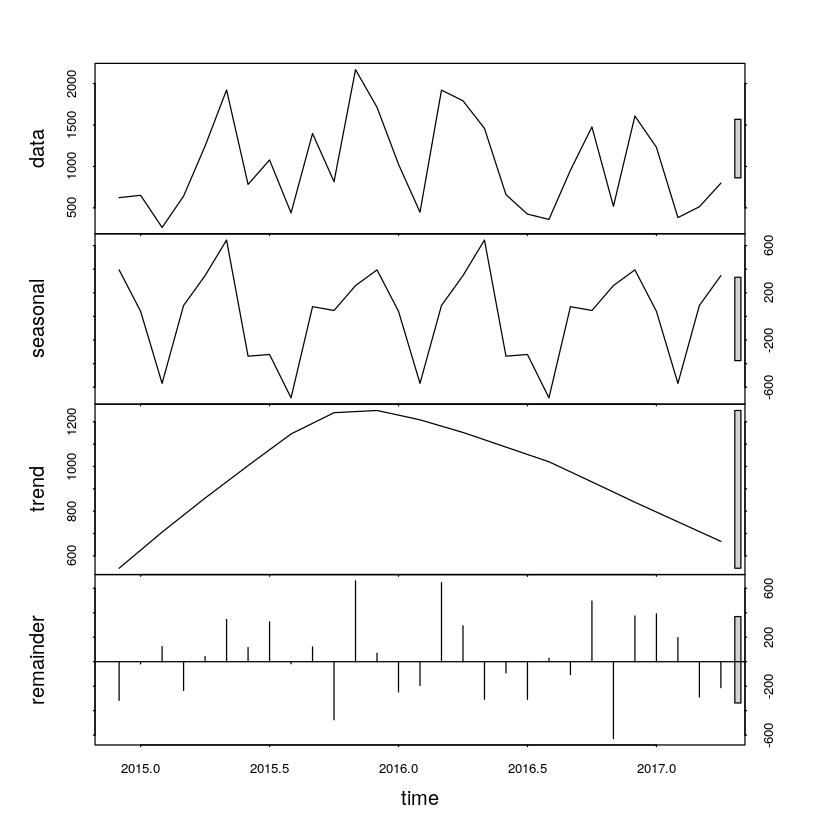

In [108]:
#perform seasonlity test
#using STL assuming additive model
#fit stl model , reconstruct time series then hypothesis testing of observed against fitted
sales.stl = stl(x = sales.monthly.ts,s.window = "per")
print(sales.stl)

plot(sales.stl)

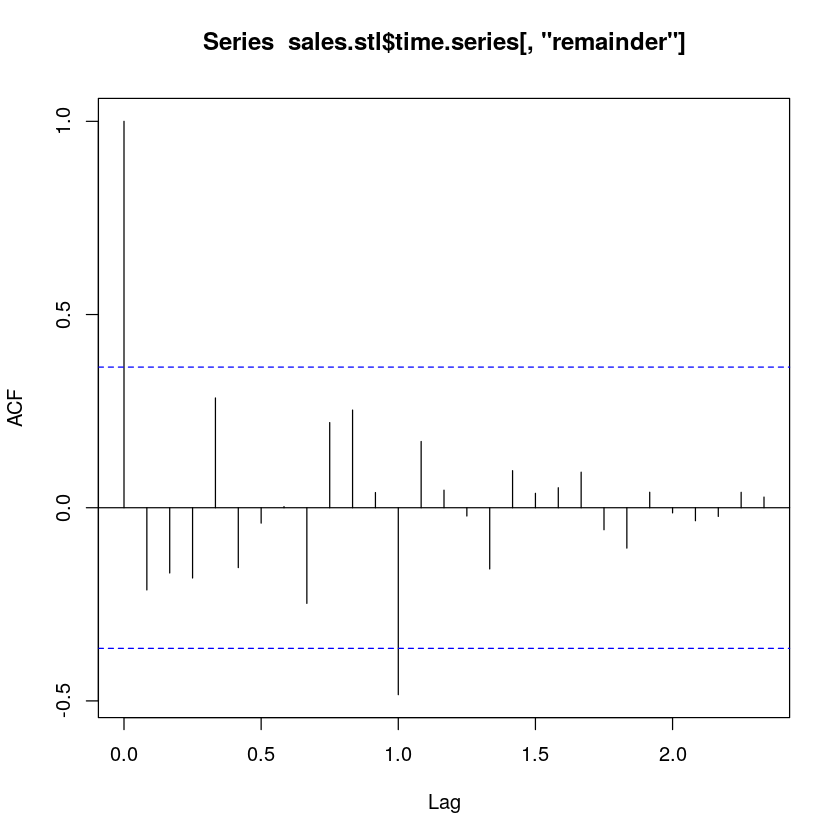

In [109]:
#Residual analysis using acf
r.acf = acf(x = sales.stl$time.series[,"remainder"],lag.max = 30)

In [110]:
#chi square test for stl model goodness of fit measures
obs.vs.fitted = data.frame(sales.stl$time.series)
obs.vs.fitted$fitted = obs.vs.fitted$trend+obs.vs.fitted$seasonal+obs.vs.fitted$remainder
obs.vs.fitted$obs = sales1.monthly$sales
print(obs.vs.fitted)

     seasonal     trend  remainder fitted  obs
1   394.02594  544.5591 -315.58503    623  623
2    43.26264  625.4465  -17.70918    651  651
3  -567.16698  706.3340  123.83299    263  263
4    92.84799  782.5085 -234.35646    641  641
5   345.52847  858.6830   41.78857   1246 1246
6   646.62634  931.3983  344.97533   1923 1923
7  -336.80790 1004.1137  115.69421    783  783
8  -322.59032 1074.9877  325.60263   1078 1078
9  -689.87273 1145.8617  -16.98895    439  439
10   82.63994 1193.4152  120.94482   1397 1397
11   50.15261 1240.9688 -475.12141    816  816
12  261.35370 1245.9465  660.69979   2168 2168
13  394.02594 1250.9242   69.04984   1714 1714
14   43.26264 1229.9328 -247.19543   1026 1026
15 -567.16698 1208.9414 -194.77438    447  447
16   92.84799 1180.7112  647.44079   1921 1921
17  345.52847 1152.4811  293.99045   1792 1792
18  646.62634 1119.6673 -307.29361   1459 1459
19 -336.80790 1086.8534  -91.04554    659  659
20 -322.59032 1054.0084 -307.41813    424  424
21 -689.87273

In [111]:
rem = sales.stl$time.series[,'remainder']
print(class(as.numeric(rem)))
Box.test(x = rem,lag = 10,fitdf = 0)
#conclusion, no evidence for residuals autocorrelation

[1] "numeric"



	Box-Pierce test

data:  rem
X-squared = 11.216, df = 10, p-value = 0.341


In [112]:
#regression model for sales with promotions
m = lm(rem~sales1.monthly$promo1+sales1.monthly$promo2)
summary(m)


Call:
lm(formula = rem ~ sales1.monthly$promo1 + sales1.monthly$promo2)

Residuals:
    Min      1Q  Median      3Q     Max 
-620.08 -240.21   33.81  132.70  669.57 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)            -8.8684    70.7680  -0.125    0.901
sales1.monthly$promo1   0.9416    38.3793   0.025    0.981
sales1.monthly$promo2 255.8137   177.9577   1.437    0.163

Residual standard error: 325.7 on 26 degrees of freedom
Multiple R-squared:  0.07603,	Adjusted R-squared:  0.004954 
F-statistic:  1.07 on 2 and 26 DF,  p-value: 0.3577


In [113]:
m1 = lm(sales1.monthly$sales~sales1.monthly$promo1+sales1.monthly$promo2)
summary(m1)


Call:
lm(formula = sales1.monthly$sales ~ sales1.monthly$promo1 + sales1.monthly$promo2)

Residuals:
   Min     1Q Median     3Q    Max 
-723.9 -473.9 -170.9  472.1 1181.1 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            986.892    124.398   7.933 2.07e-08 ***
sales1.monthly$promo1   -6.295     67.464  -0.093    0.926    
sales1.monthly$promo2  210.550    312.819   0.673    0.507    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 572.6 on 26 degrees of freedom
Multiple R-squared:  0.01714,	Adjusted R-squared:  -0.05846 
F-statistic: 0.2267 on 2 and 26 DF,  p-value: 0.7987


ETS(A,N,N) 

Call:
 ets(y = sales.monthly.ts) 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 1010.863 

  sigma:  546.9211

     AIC     AICc      BIC 
469.3012 470.2612 473.4031 

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.1484449 546.9211 475.9382 -38.85613 66.73999 0.7833236
                  ACF1
Training set 0.1986107


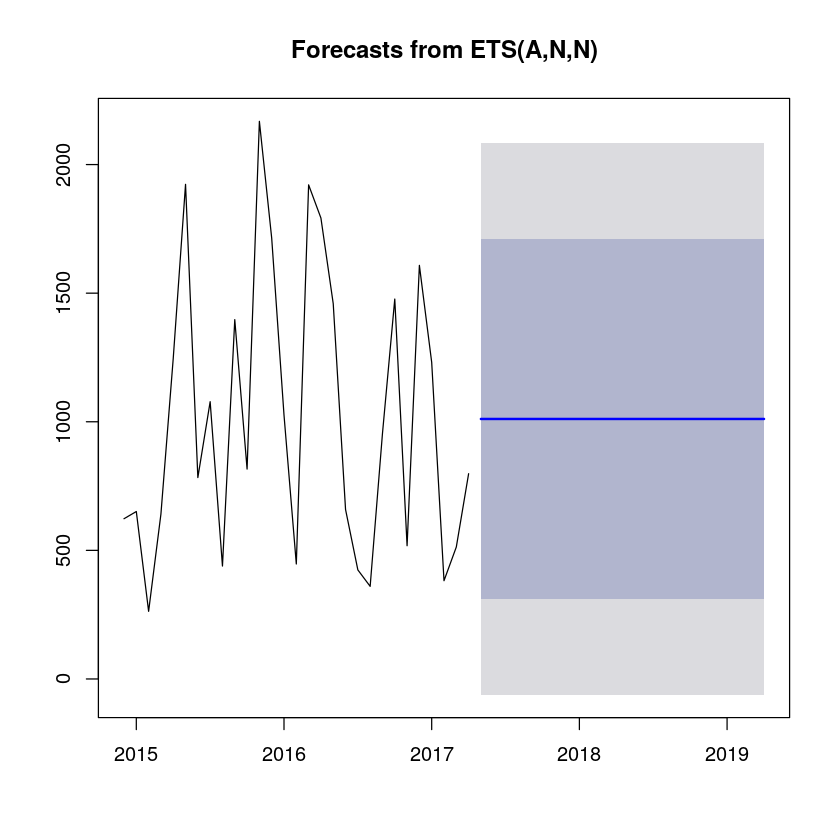

In [121]:
ets.auto = ets(y = sales.monthly.ts)
summary(ets.auto)
plot(forecast(ets.auto))

In [144]:
#simple model selection based on train/test partitioning
ets.rolling.origin<-function(data.ts,ets.model,max.test.size = 3){
    errors = c("MAPE","RMSE")
    error.measures = rep(0,length(errors))
    names(error.measures)<- errors
    for(test.size in 1:max.test.size){
        train.size = length(data.ts)-test.size
        test.data = data.ts[(train.size+1):length(data.ts)]
        train.ts = ts(data = data.ts[1:train.size],start = start(data.ts)
                      ,frequency = frequency(data.ts))
        ets.model = ets(y = train.ts,model = ets.model)
        ets.forecast = forecast.ets(object = ets.model,h = test.size)
        #pred.true = data.frame(pred = as.numeric(ets.forecast$mean),actual = test.data)
        #print(pred.true)
        mape = MAPE(y_pred = as.numeric(ets.forecast$mean),y_true = test.data)
        rmse = RMSE(y_pred = as.numeric(ets.forecast$mean),y_true = test.data)
        error.measures["MAPE"] = error.measures["MAPE"]+mape # sum all errors
        error.measures["RMSE"] = error.measures["RMSE"]+rmse
    }
    error.measures = error.measures/max.test.size #average
    return(error.measures)
}

In [149]:
ets.models = c("AAA","ANA","AAN","ANN") # additive stl models
best.ets.model = NA
min.MAPE = Inf
for(ets.model in ets.models){
    err = ets.rolling.origin(data.ts = sales.monthly.ts,ets.model = ets.model
                             ,max.test.size = 3)
    cat("Model  = ",ets.model," MAPE = ",err['MAPE'],'\n')
    if(err["MAPE"]<min.MAPE){
        min.MAPE = err["MAPE"]
        best.ets.model = ets.model
    }
}
cat('Best ets model = ',best.ets.model,'\n')
cat('Min MAPE = ',min.MAPE,'\n')

Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.
Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.


Model  =  AAA  MAPE =  1.05895 


Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.
Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.


Model  =  ANA  MAPE =  0.9368331 


Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.
Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.


Model  =  AAN  MAPE =  0.3593543 


Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.
Model is being refit with current smoothing parameters but initial states are being re-estimated.
Set 'use.initial.values=TRUE' if you want to re-use existing initial values.


Model  =  ANN  MAPE =  0.6658187 
Best ets model =  AAN 
Min MAPE =  0.3593543 
